# RBIG Code Translation

# Table of Contents

1. [Algorithm Breakdowns](#functioncompare)
    1. [norminv](#invnorm)
    2. [histogram](#hist)
2. [Algorithm Steps](#algos)

    1. [rbig](#rbig)
    2. [apply_rbig](#apply_rbig)
    3. [inv_rbig](#inv_rbig)
    4. [marginal_gaussianization](#marggaus)
    5. [marginal_normalization](#margnorm)

### Algorithm Steps

1. Get sample data.

##### 2. Get RBIG Transformation

2. Get default parameters
3. Get tolerance for m and n
4. Iterate
5. Perform marginal Gaussianization
6. Rotate
7. Multi-Information Reduction

##### 3. Apply RBIG to data

1. Compute Transform in groups od 500000
2. Marginal Gaussianization
3. Marginal Uniformization
3. Do transformation

##### 4. Invert Data

1. Transform data
2. Perform Inverse Gaussianization
3. Inverse Marginal Uniformization

#### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.utils import check_random_state

#### Synthetic Data

In [2]:
num_points = 1000
noise = 0.2
random_state = 123

generator = check_random_state(random_state)

x_auxilary = generator.randn(1, num_points)

x = np.cos(x_auxilary)
x = np.vstack((x, np.sinc(x_auxilary)))

x = x + noise * generator.rand(2, num_points)
x = np.dot(np.array([[0.5, 0.5], [-0.5, 0.5]]), x).T

In [7]:
# print out debugging information
print('\nSize of x_auxilary:\n', np.shape(x_auxilary))
print('\nSize of x:\n', np.shape(x))
print('\nX matrix of data: X: \n', x[:10])


Size of x_auxilary:
 (1, 1000)

Size of x:
 (1000, 2)

X matrix of data: X: 
 [[ 0.35383518 -0.26096163]
 [ 0.29121136 -0.28741346]
 [ 1.01739222  0.01277522]
 [ 0.05016715 -0.15425159]
 [ 0.80852538 -0.18760441]
 [ 0.01693714 -0.09318099]
 [-0.21155181  0.48186821]
 [ 0.87166265 -0.14748258]
 [ 0.07779465 -0.2517276 ]
 [ 0.52612833 -0.20856523]]


#### Plot Toy Data

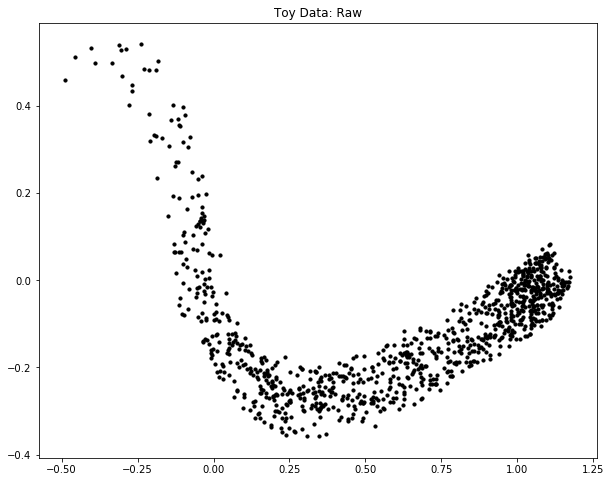

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x[:,0], x[:,1], s=10, c='k', label='Toy Data')
ax.set_title('Toy Data: Raw')

plt.show()

#### Important Parameters

* precision (default = 1000) 
    + Number of points for the marginal PDF estimation
* porc (default = 10)
    + extra domain percentage
* transformation (default = 'PCA')
    + linear transformation applied (options - ICA, PCA, RND)
* num_layers (default = 1000
    + number of layers
* tolerance_samples
* tolerance_dimensions

In [11]:
precision = 1000
domain_prnt = 10
transformation = 'pca'
num_layers = 1000

# get size of the X data
n_samples, dimensions  = x.shape

In [12]:
print('Number of dimensions:', dimensions)
print('Number of samples:', n_samples)

Number of dimensions: 2
Number of samples: 1000


#### Estimation of Histogram

**MATLAB** Function

* Inputs
    + x - vector
    + nbins - 
* Outputs
    + counts -
    + centers - 

### Tolerance (Samples, Dimensions)

In [14]:
[counts, centers] = np.histogram(a=np.random.randn(1, np.round(n_samples)), bins=np.int(np.round(np.sqrt(n_samples))))
centers = centers[:-1] + np.diff(centers)/2
print('Size of counts: ', np.shape(counts))
print('Size of centers: ', np.shape(centers))

Size of counts:  (32,)
Size of centers:  (32,)


In [21]:
n_errors = 1000
ee = np.zeros(n_errors)

for rep in np.arange(0,n_errors):
    
    # HX
    [counts, centers] = np.histogram(a=generator.randn(1, np.round(n_samples)),
                                     bins=np.int(np.round(np.sqrt(n_samples))))
    
    delta = centers[1]-centers[0]
    
    constant = 0.5 * (np.sum(counts[counts > 0]) - 1) / np.sum(counts)
    counts = counts / np.sum(counts)
    hx = -np.sum(counts[counts != 0] * np.log(counts[counts!=0])) + constant
    
    # HY
    [counts, centers] = np.histogram(a=generator.randn(1, np.round(n_samples)),
                                     bins=np.int(np.round(np.sqrt(n_samples))))
    delta = centers[1]-centers[0]
    
    constant = 0.5 * (np.sum(counts[counts > 0]) - 1) / np.sum(counts)
    counts = counts / np.sum(counts)
    hy = -np.sum(counts[counts != 0]  * np.log(counts[counts!=0])) + constant
    
    ee[rep] = hy - hx
    
tol_samples = np.mean(ee)
tol_dimensions = np.std(ee)

print('Tolerance Samples: ', tol_samples)
print('Tolerance Dimensions: ', tol_dimensions)

Tolerance Samples:  0.00151974400752
Tolerance Dimensions:  0.103383390898


In [22]:
def entropy(counts):
    constant = 0.5 * (np.sum(counts[counts > 0]) - 1) / np.sum(counts)
    print(constant)
    hist_counts = counts / np.sum(counts)
    idx = np.where(hist_counts != 0)
    H = -np.sum(hist_counts[hist_counts != 0])  * np.log(hist_counts[hist_counts!=0]) + constant

In [28]:
del R
for ilayer in np.arange(0, 1):
    
    for idim in np.arange(0, 1):
        
        temp1, temp2 = 

0.34245549952


/home/emmanuel/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


### Marginal Gaussianization

In [46]:
from scipy.stats import invgauss
from scipy.interpolate import interp1d


def marginal_guassianization(x, domain_percentage=10, precision=1000):
    
    [X_uniform, T] = marginal_uniformization(X, domain_percentage=domain_percentage,
                                             precision=precision)
    
    X_gauss = invgauss.cdf(X_uniform, 0)
    
    return X_gauss, T

### Marginal Uniformization

In [23]:
def marginal_uniformization(x, domain_percentage=10, precision=1000):
    
    p_aux = (domain_percentage/100) * np.abs(x.max() - x.min())
    R_aux = np.linspace(x.min(), x.max(), num=2 * np.sqrt(np.len(x))+1)
    R = np.mean(np.array([[R_aux[:-1]], [R_aux[1:]]]))
    
    [p, R] = np.histogram(a=x, bins=R)
    
    R_delta = R[2]-R[1]
    T.R_ant = np.array([R[0]-R_delta, R, R[-1]+R_delta])
    T.p_ant = np.array([0, p / (np.sum(p) * (R[3]-R[2])), 0])
    
    C = np.array([np.cumsum(p)])
    N = C.max()
    
    R_incr = (R[1]-R[0])/2
    
    R = np.array([x.min()-p_aux, x.min(), R[:-1]+R_incr, x.max(), p_aux+R_incr])
    C = np.array([0, 1/N, C, 1])
    
    Range_2 = np.linspace(R[0], R[-1], num=precision)
    set_interp = interp1d(R, C, kind='linear')
    C_2 = made_monotonic(set_interp(Range_2))
    C_2 = C_2/C_2.max()
    x_lin = interp1(Range_2, C, x)
    
    T.C = C_2
    T.R = Range_2
    
    return X_lin, T

#### Make Monotonic

In [24]:
def make_monotonic(f):
    
    fn = f
    for nn in arange(2,len(fn)):
            if fn[n] <= fn[nn-1]:
                if abs(fn[nn-1]) > 1e-14:
                    fn[nn] = fn[nn-1] + 1.0e-14
                elif fn[nn-1] == 0:
                    fn[nn] = 1e-80
                else:
                    fn[nn] == fn[nn-1] + 10**(np.log(abs(fn[nn-1])))
    
    return fn

### Rotation

### Multi-Information Reduction

[DIM,Nsamples] = size(X);

for n=1:DIM
    [p R]=hist(X(n,:),sqrt(Nsamples));
    delta = R(3)-R(2);
    hx(n)=entropy_mm(p)+log2(delta);

    [p R]=hist(Y(n,:),sqrt(Nsamples));
    delta = R(3)-R(2);
    hy(n)=entropy_mm(p)+log2(delta);
end

I = sum(hy) - sum(hx);
II = sqrt(sum((hy - hx).^2));
p = 0.25;
if abs(II)<sqrt(DIM*((p*tol_d.^2)))
    I=0;
end

#####

for rep=1:1000
    [p R] = hist(randn(1,round(Nsamples)),round(sqrt(Nsamples)));
    delta = R(3)-R(2);
    hx = entropy_mm(p)+log2(delta);

    [p R] = hist(randn(1,round(Nsamples)),round(sqrt(Nsamples)));
    delta = R(3)-R(2);
    hy = entropy_mm(p)+log2(delta);
    ee(rep) = hy - hx;
end
    
######

[counts, centers] = np.histogram(a=np.random.randn(1, np.round(n_samples)),
                                 bins=np.int(np.round(np.sqrt(n_samples))))

delta = centers[1]-centers[0]

constant = 0.5 * (np.sum(counts[counts > 0]) - 1) / np.sum(counts)
counts = counts / np.sum(counts)
hx = -np.sum(counts[counts != 0] * np.log(counts[counts!=0])) + constant
hx += delta

In [47]:
def information_reduction(X, Y, tol_m, tol_d, random_state=None):
    
    generator = check_random_state(random_state)
    dimensions, n_samples = X.shape
    
    hx = np.zeros(n)
    for n in np.arange(0, dimensions):
        
        # calculate entropy in X direction
        [p, R] = np.histogram(a=X[n,:], np.sqrt(n_samples))
        delta = R[2] - R[1]
        hx[n] = entropy(p) + np.log(delta)
        
        # calculate entropy in Y direction
        [p, R] = np.histogram(a=Y[n,:], np.sqrt(n_samples))
        delta = R[2] - R[1]
        hy[n]
        
    I = np.sum(hy) - np.sum(hx)
    II = np.sqrt(np.sum((hy-hx)**2))
    p = 0.25
    
    if np.abs(II) < np.sqrt(dimensions * p * tol_d ** 2):
        I = 0
        
    return I

SyntaxError: positional argument follows keyword argument (<ipython-input-47-b501b1e03632>, line 10)

## 2. Function Comparisons
<a id="functioncompare"></a>

<a id="invnorm"></a>
### Inverse of the Normal Distribution, $ N (\mu, \sigma)$


**MATLAB** Function:

```matlab
x = norminv(data, mu, sigma)
```

**Python** Function:

```python
x = norm.ppf(data, mu, sigma)
```

Resources
* [MATLAB Function](https://es.mathworks.com/help/stats/norminv.html)
* [Python Function](https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.norm.html#scipy.stats.norm)
* [Stackoverflow](https://stackoverflow.com/questions/46199199/how-to-calculate-normal-inverse-cumulative-distribution-function-efficiently-in)
* [Stackoverflow](https://stackoverflow.com/questions/20626994/how-to-calculate-the-inverse-of-the-normal-cumulative-distribution-function-in-p)

### Histogram Function

**MATLAB** Function:
```matlab
[bin_counts, bin_centers] = hist(x, n_bins)
[bincounts, ind] = histc(x, binranges, dimension)
```

**Python** Function

```python
[bin_counts, bin_edges] = np.histogram(x, bins)
```

MATLAB defines the hist vector as bin-centers. Numpy words with bin-edges.

Resources

* MATLAB [hist Function](https://es.mathworks.com/help/matlab/ref/hist.html)
* MATLAB [histc Function](https://es.mathworks.com/help/matlab/ref/histc.html)
* [Python Function]()
* Element differences - [stackoverflow](https://stackoverflow.com/questions/18065951/why-does-numpy-histogram-python-leave-off-one-element-as-compared-to-hist-in-m)
* match MATLAB hist() with numpy histogram() - [stackoverflow](https://stackoverflow.com/questions/41869651/match-matlab-hist-with-numpy-histogram)
* replicate histc() in numpy - [stackoverflow](https://stackoverflow.com/questions/32765333/how-do-i-replicate-this-matlab-function-in-numpy/32765547#32765547)



## Algorithm Steps

### **toy_example_RBIG_2017.m**

##### Major Steps

1. Generate toy data.
2. Plot toy data.
3. Learn the transformation that *gaussianizes* the data.
4. Apply learned transformation to new data.
5. Synthesize new data from *Gaussian* data.
6. Plot results.

### RBIG_2017.m
<a id="rbig"></a>

#### Variables

* precision
* percent
* transformation (PCA, random projections, ICA)
* number of layers

#### Major Steps

1. Check parameters.
2. Get data dimensions.
3. Estimate the tolerance (mean, standard deviation).
4. Marginal Gaussianization.
5. Rotation.
6. Multi-Information Reduction

#### Methods

* Information Reduction
* Entropy (MLE, Miller-Maddow Correction)
* Marginal Gaussianization
* Marginal Uniformization
* Made Monotonic

### inv_rbig.m

#### Major Steps

1. Get dimensions of the data.
2. Use transformation for all data.
3. Inverse Marginal Gaussianization.
4. Inverse Gaussian Uniformization.